Import the data, generate comparison, train test split, isolate to less than 0.25 on all boxes, train isolator with all boxes

visualize isolation, visualize final prediction with bagging regressor

In [95]:
# import the libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
from pylab import rcParams

# style the charts
rcParams['figure.figsize'] = 10, 5
rcParams['font.size'] = 20
rcParams['figure.dpi'] = 100
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'

# style the tables
pd.set_option("display.max_rows",15)
pd.set_option("display.max_columns",15)

# read all the CSV files one by one and store them in a list
dfs = []

for i in range(1, 8):
    dfs.append(pd.read_csv("../data/PM_estimation/SKOMOBO-dust" + str(i) +".csv", index_col=0, parse_dates=True))

# join up all the dataframes in the list into one huge dataframe
all_data = pd.concat(dfs)

# change the index so that it is based on the date and time and rearrange the columns so that equipment ID comes first
# variable and value
all_data = all_data.set_index(pd.DatetimeIndex(all_data.DT.values))[["EQM_ID", "variable", "value"]]

In [96]:
# extract the PM10 dustrack data and store it
DustTrackPM10 = all_data[all_data["EQM_ID"] == "PM10DT"]

# extract the PM2.5 dustrack data and store it
DustTrackPM2_5 = all_data[all_data["EQM_ID"] == "PM2.5DT"]

# create a list of box names like SKOMOBO, SKOMOBO1, SKOMOBO2 etc
ids = ["SKOMOBO"] + ["SKOMOBO" + str(i) for i in range(1, 8)]

# extract all the skomobos data
Skomobos = all_data[all_data["EQM_ID"].isin(ids)]

# isolate PM10 data and PM2.5 data
SkomoboPM10 = Skomobos[Skomobos["variable"] == "PM10"]
SkomoboPM2_5 = Skomobos[Skomobos["variable"] == "PM2.5"]

In [97]:
SkomoboPM10["value"] = SkomoboPM10["value"] / 1000
SkomoboPM2_5["value"] = SkomoboPM2_5["value"] / 1000

c:\users\ryan\anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\ryan\anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [98]:
# join the dataframes
comparisonPM10 = SkomoboPM10.join(DustTrackPM10["value"], rsuffix="_dustrack").dropna()[["EQM_ID", "value", "value_dustrack"]]
comparisonPM2_5 = SkomoboPM2_5.join(DustTrackPM2_5["value"], rsuffix="_dustrack").dropna()[["EQM_ID", "value", "value_dustrack"]]

# change column names
comparisonPM10 = comparisonPM10.rename(columns={"value": "skomobo", "value_dustrack": "dustrack"})
comparisonPM2_5 = comparisonPM2_5.rename(columns={"value": "skomobo", "value_dustrack": "dustrack"})
comparisonPM10

,EQM_ID,skomobo,dustrack
2017-05-12 17:31:00,SKOMOBO,0.000,0.011
2017-05-12 17:32:00,SKOMOBO,0.000,0.012
2017-05-12 17:33:00,SKOMOBO,0.000,0.013
2017-05-12 17:34:00,SKOMOBO,0.000,0.013
2017-05-12 17:35:00,SKOMOBO,0.001,0.012
2017-05-12 17:36:00,SKOMOBO,0.001,0.009
2017-05-12 17:37:00,SKOMOBO,0.001,0.011
...,...,...,...
2017-07-13 11:59:00,SKOMOBO6,0.512,0.039
2017-07-13 12:00:00,SKOMOBO1,19.712,0.036


In [5]:
from sklearn.ensemble import IsolationForest, BaggingRegressor
from sklearn.model_selection import train_test_split

In [99]:
trainPM10, testPM10 = train_test_split(comparisonPM10)

In [100]:
trainPM10["dust_diff"] = trainPM10["skomobo"] - trainPM10["skomobo"].shift(-1)
trainPM10 = trainPM10.fillna(0)
testPM10["dust_diff"] = testPM10["skomobo"] - testPM10["skomobo"].shift(-1)
testPM10 = testPM10.fillna(0)

c:\users\ryan\anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\ryan\anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
lessTrainPM10 = trainPM10[trainPM10["skomobo"]<0.25].copy()
lessTestPM10 = testPM10[testPM10["skomobo"]<0.25].copy()

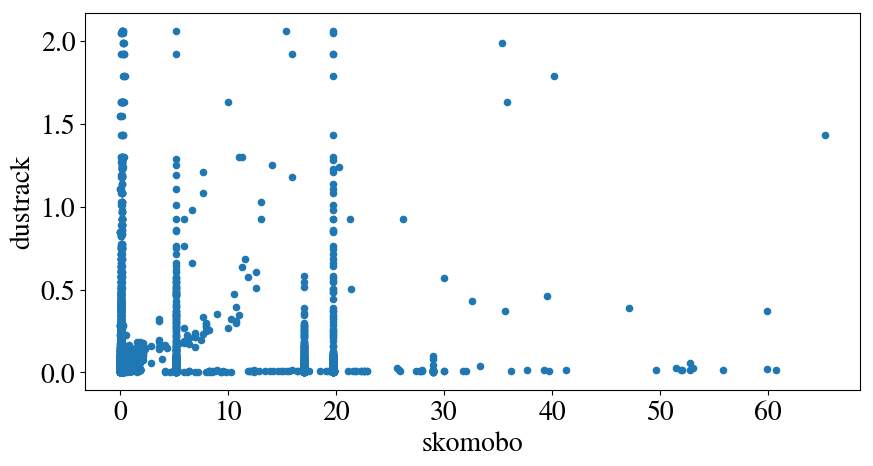

In [101]:
trainPM10.plot(kind = "scatter", x="skomobo", y="dustrack")

In [44]:
outlierDetectorPM10 = IsolationForest(contamination = 0.0001).fit(lessTrainPM10[["skomobo"]])
trainPM10["is_inlier"] = outlierDetectorPM10.predict(trainPM10[["skomobo"]])

In [126]:
outlierDetectorPM10 = IsolationForest(contamination = 0.2, random_state = 123).fit(trainPM10[["skomobo"]])
trainPM10["is_inlier"] = outlierDetectorPM10.predict(trainPM10[["skomobo"]])

In [127]:
testPM10["is_inlier"] = outlierDetectorPM10.predict(testPM10[["skomobo"]])

In [128]:
cleanTrainPM10= trainPM10[trainPM10["is_inlier"] == 1]
cleanTestPM10= testPM10[testPM10["is_inlier"] == 1]

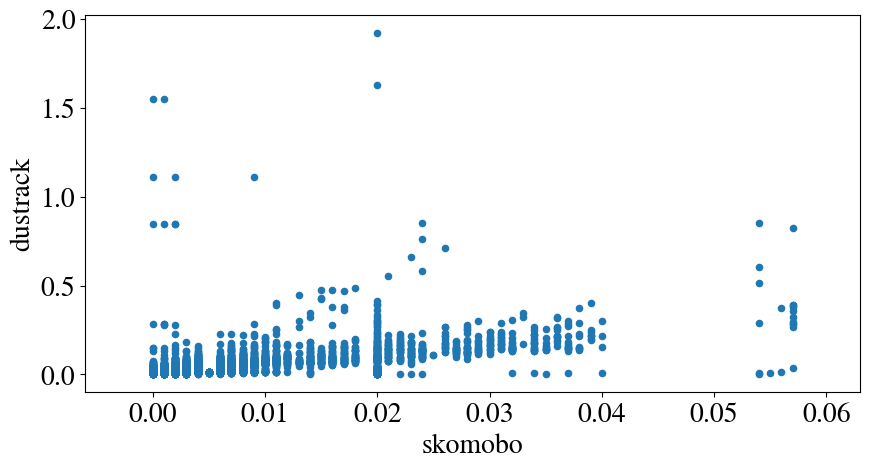

In [129]:
cleanTrainPM10.plot(kind = "scatter", x="skomobo", y="dustrack")

In [130]:
cleanTrainPM10

,EQM_ID,skomobo,dustrack,dust_diff,is_inlier,prediction
2017-07-10 09:42:00,SKOMOBO3,0.001,0.009,-19.711,1,0.008887
2017-06-06 14:06:00,SKOMOBO4,0.000,0.005,0.000,1,0.006198
2017-06-03 04:44:00,SKOMOBO5,0.000,0.004,-0.002,1,0.006540
2017-06-06 10:10:00,SKOMOBO5,0.002,0.011,0.000,1,0.011248
2017-06-04 22:51:00,SKOMOBO5,0.002,0.008,-5.118,1,0.012100
2017-06-04 13:14:00,SKOMOBO1,0.002,0.006,0.001,1,0.012076
2017-07-08 16:38:00,SKOMOBO6,0.001,0.010,0.001,1,0.008870
...,...,...,...,...,...,...
2017-05-30 01:28:00,SKOMOBO1,0.020,0.010,0.014,1,0.013656
2017-07-06 20:05:00,SKOMOBO1,0.006,0.017,0.005,1,0.021524


In [131]:
len(cleanTrainPM10["skomobo"])/float(len(trainPM10["skomobo"]))

0.7848165356206814

In [132]:
len(cleanTestPM10["skomobo"])/float(len(testPM10["skomobo"]))

0.786967269261697

In [145]:
PM10Model = BaggingRegressor(random_state = 123).fit(cleanTrainPM10[["skomobo", "dust_diff"]], cleanTrainPM10["dustrack"])

In [146]:
cleanTrainPM10["prediction"] = PM10Model.predict(cleanTrainPM10[["skomobo", "dust_diff"]])

c:\users\ryan\anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [147]:
cleanTestPM10["prediction"] = PM10Model.predict(cleanTestPM10[["skomobo", "dust_diff"]])

c:\users\ryan\anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


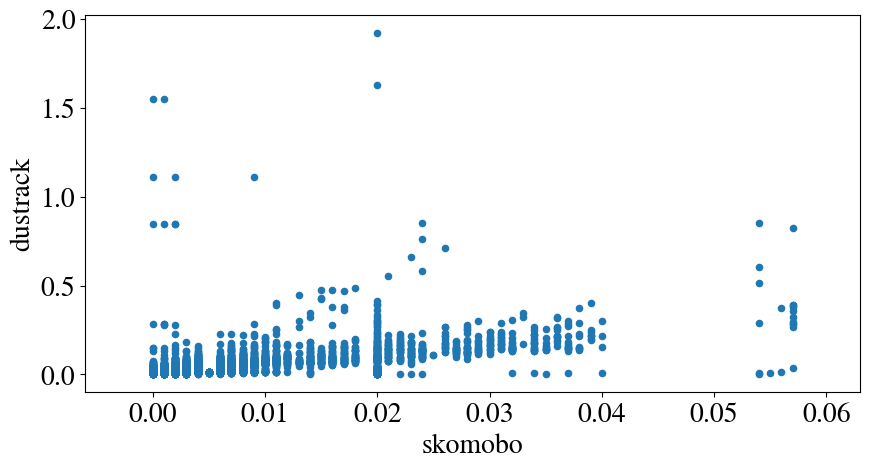

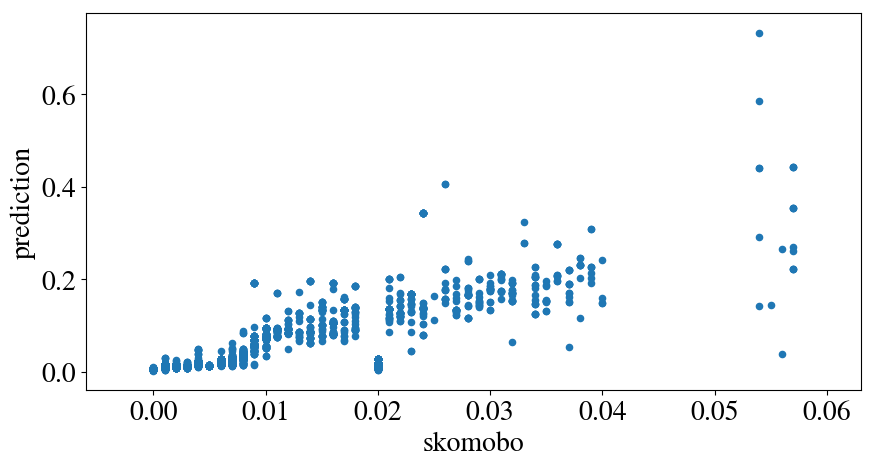

In [138]:
cleanTrainPM10.plot(kind = "scatter", x="skomobo", y="dustrack")
cleanTrainPM10.plot(kind = "scatter", x="skomobo", y="prediction")

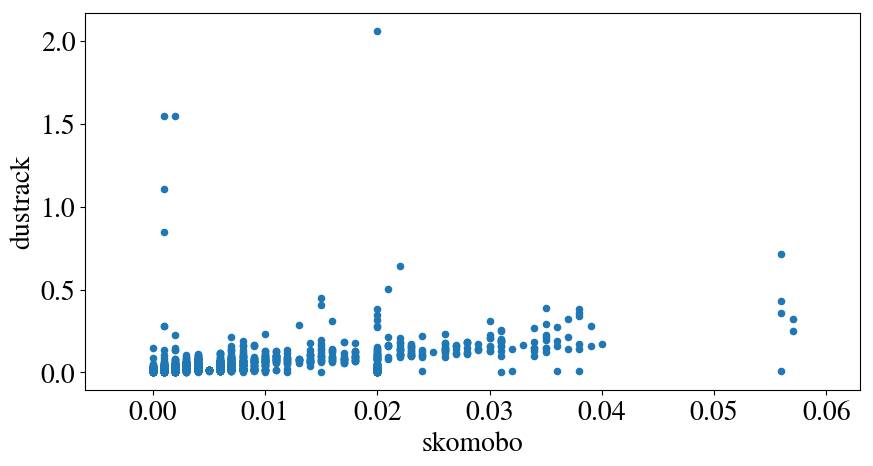

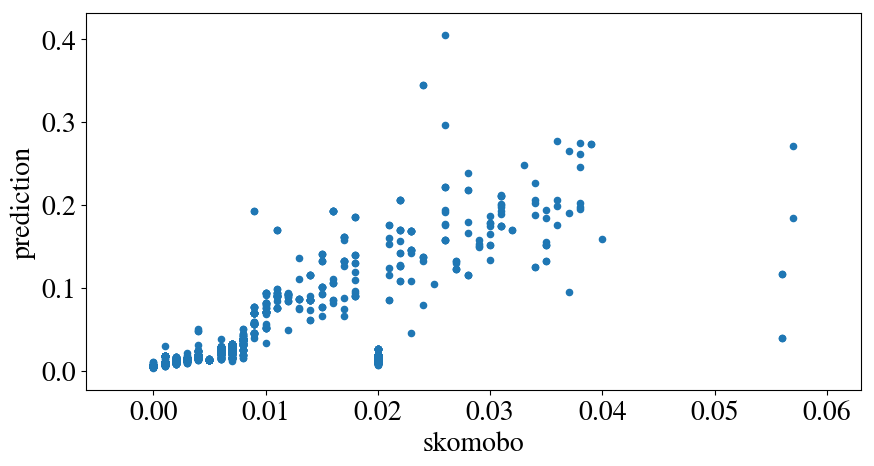

In [148]:
cleanTestPM10.plot(kind = "scatter", x="skomobo", y="dustrack")
cleanTestPM10.plot(kind = "scatter", x="skomobo", y="prediction")

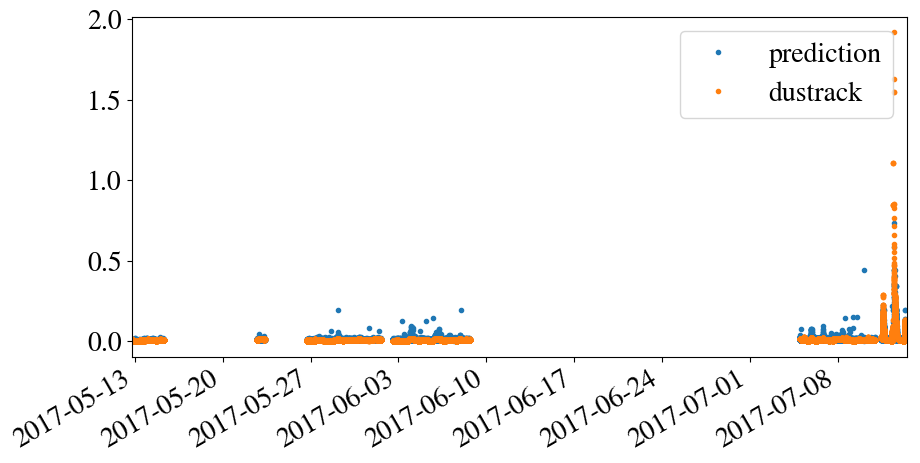

In [140]:
cleanTrainPM10[["prediction", "dustrack"]].plot(style='.')

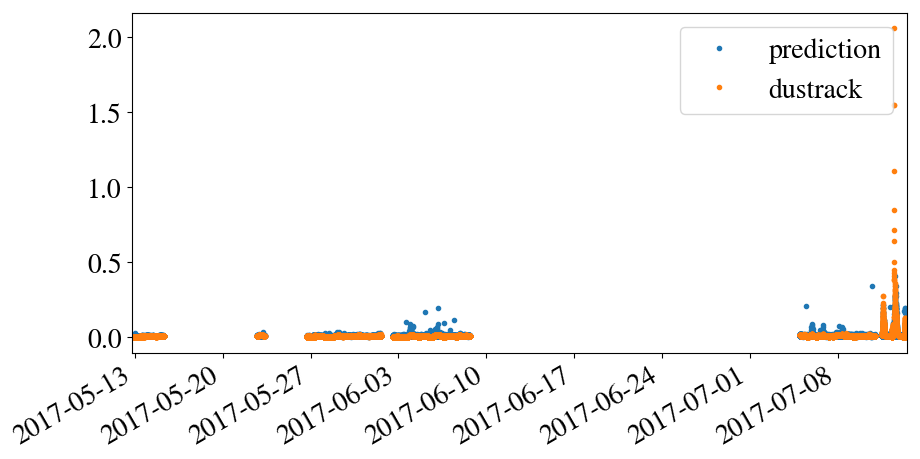

In [149]:
cleanTestPM10[["prediction", "dustrack"]].plot(style='.')

In [150]:
dirtyPM10Model = BaggingRegressor(random_state = 123).fit(trainPM10[["skomobo", "dust_diff"]], trainPM10["dustrack"])

In [152]:
trainPM10["other_prediction"] = dirtyPM10Model.predict(trainPM10[["skomobo", "dust_diff"]])

In [153]:
testPM10["other_prediction"] = dirtyPM10Model.predict(testPM10[["skomobo", "dust_diff"]])

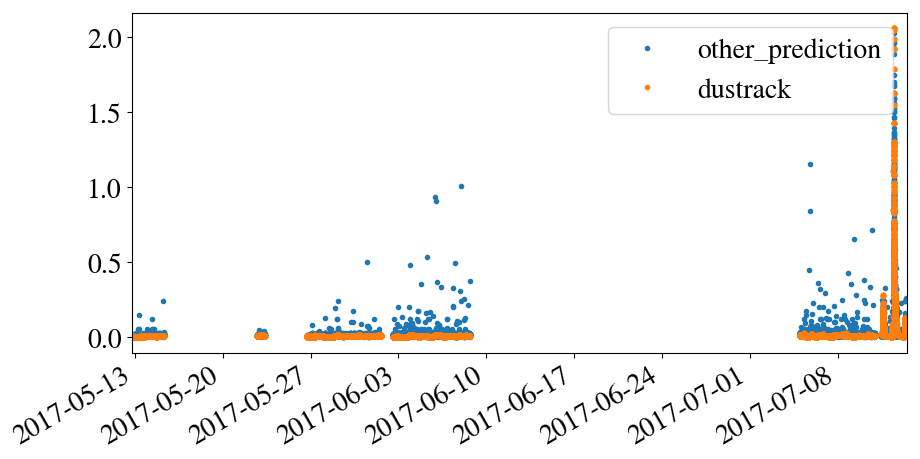

In [154]:
trainPM10[["other_prediction", "dustrack"]].plot(style='.')

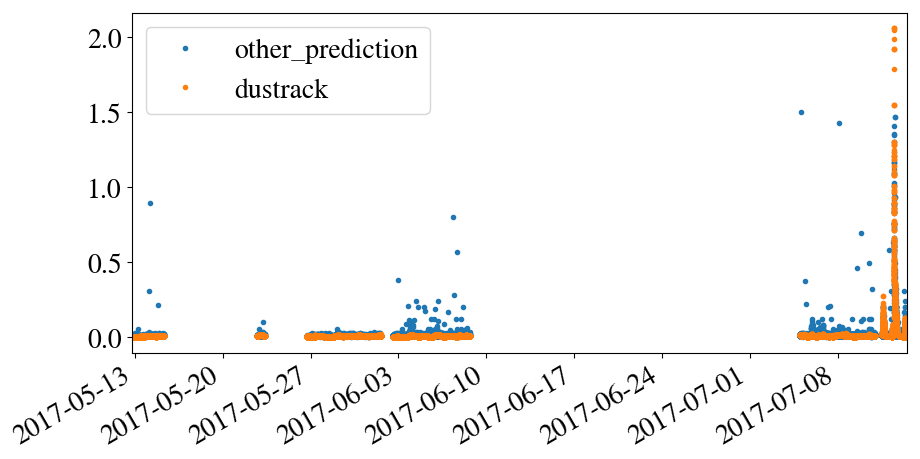

In [156]:
testPM10[["other_prediction", "dustrack"]].plot(style='.')

# seems pretty good lets finish off with pm2.5 and just export the models now after unleashing on full data not train test split

In [157]:
trainPM2_5, testPM2_5 = train_test_split(comparisonPM2_5)

In [158]:
trainPM2_5["dust_diff"] = trainPM2_5["skomobo"] - trainPM2_5["skomobo"].shift(-1)
trainPM2_5 = trainPM2_5.fillna(0)
testPM2_5["dust_diff"] = testPM2_5["skomobo"] - testPM2_5["skomobo"].shift(-1)
testPM2_5 = testPM2_5.fillna(0)

c:\users\ryan\anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\ryan\anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


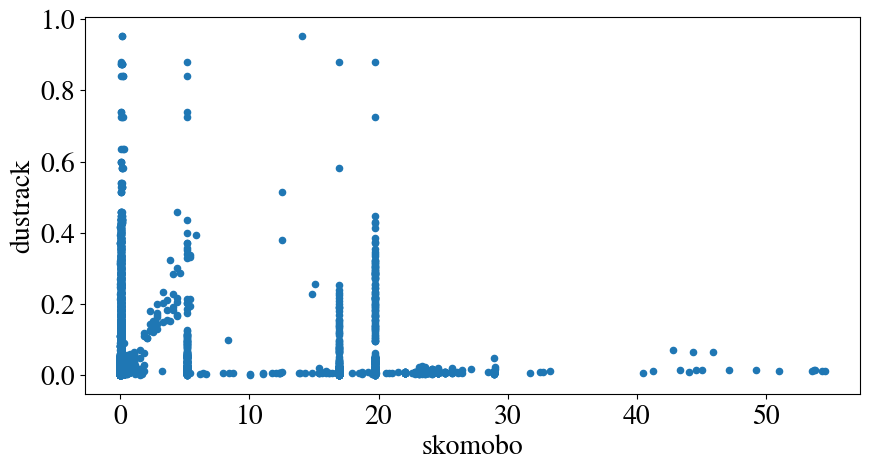

In [159]:
trainPM2_5.plot(kind = "scatter", x="skomobo", y="dustrack")

In [160]:
outlierDetectorPM2_5 = IsolationForest(contamination = 0.2, random_state = 123).fit(trainPM2_5[["skomobo"]])
trainPM2_5["is_inlier"] = outlierDetectorPM2_5.predict(trainPM2_5[["skomobo"]])

In [161]:
testPM2_5["is_inlier"] = outlierDetectorPM2_5.predict(testPM2_5[["skomobo"]])

In [162]:
cleanTrainPM2_5= trainPM2_5[trainPM2_5["is_inlier"] == 1]
cleanTestPM2_5= testPM2_5[testPM2_5["is_inlier"] == 1]

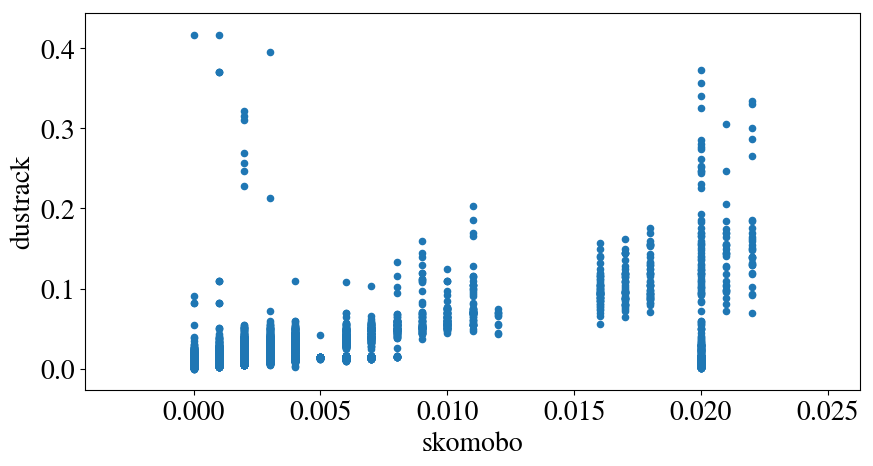

In [163]:
cleanTrainPM2_5.plot(kind = "scatter", x="skomobo", y="dustrack")

In [164]:
cleanTrainPM2_5

,EQM_ID,skomobo,dustrack,dust_diff,is_inlier
2017-07-06 05:42:00,SKOMOBO1,0.000,0.004,0.000,1
2017-07-06 09:11:00,SKOMOBO5,0.000,0.006,-0.002,1
2017-07-07 23:47:00,SKOMOBO1,0.002,0.011,-19.710,1
2017-07-08 07:42:00,SKOMOBO3,0.003,0.011,0.002,1
2017-06-03 05:04:00,SKOMOBO4,0.001,0.004,-0.002,1
2017-06-06 04:36:00,SKOMOBO5,0.003,0.014,-16.970,1
2017-07-07 19:44:00,SKOMOBO6,0.003,0.010,-0.001,1
...,...,...,...,...,...
2017-06-03 09:06:00,SKOMOBO5,0.000,0.004,-0.020,1
2017-06-05 22:42:00,SKOMOBO2,0.020,0.013,0.020,1


In [165]:
len(cleanTrainPM2_5["skomobo"])/float(len(trainPM2_5["skomobo"]))

0.798000655197403

In [166]:
len(cleanTestPM2_5["skomobo"])/float(len(testPM2_5["skomobo"]))

0.8015665018762285

In [167]:
PM2_5Model = BaggingRegressor(random_state = 123).fit(cleanTrainPM2_5[["skomobo", "dust_diff"]], cleanTrainPM2_5["dustrack"])

In [168]:
cleanTrainPM2_5["prediction"] = PM2_5Model.predict(cleanTrainPM2_5[["skomobo", "dust_diff"]])

c:\users\ryan\anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [169]:
cleanTestPM2_5["prediction"] = PM2_5Model.predict(cleanTestPM2_5[["skomobo", "dust_diff"]])

c:\users\ryan\anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


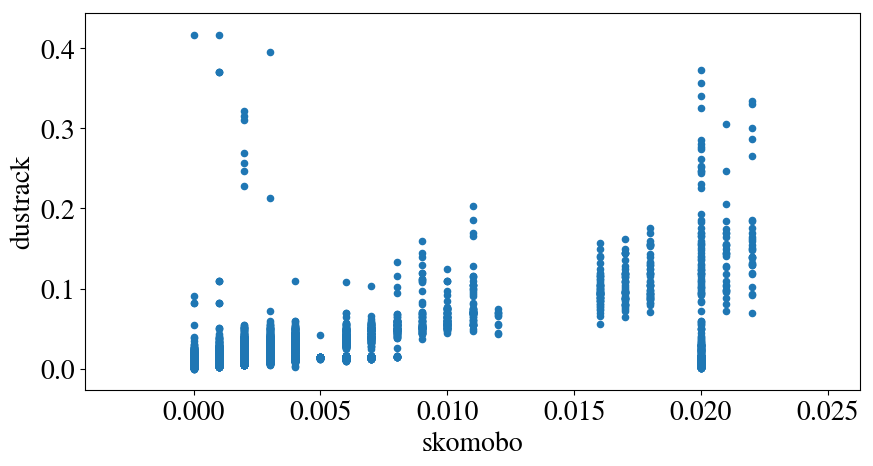

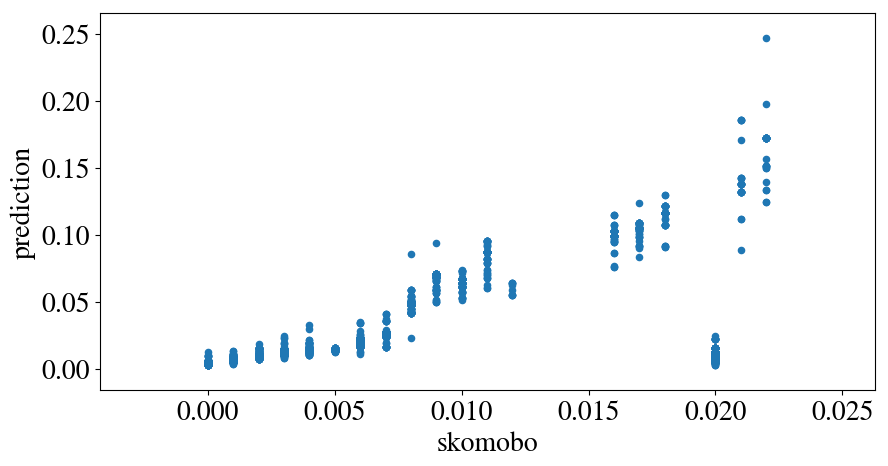

In [170]:
cleanTrainPM2_5.plot(kind = "scatter", x="skomobo", y="dustrack")
cleanTrainPM2_5.plot(kind = "scatter", x="skomobo", y="prediction")

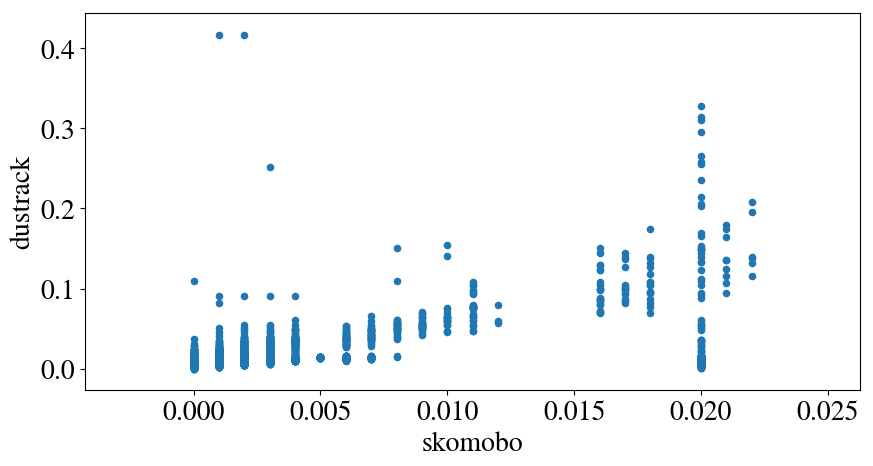

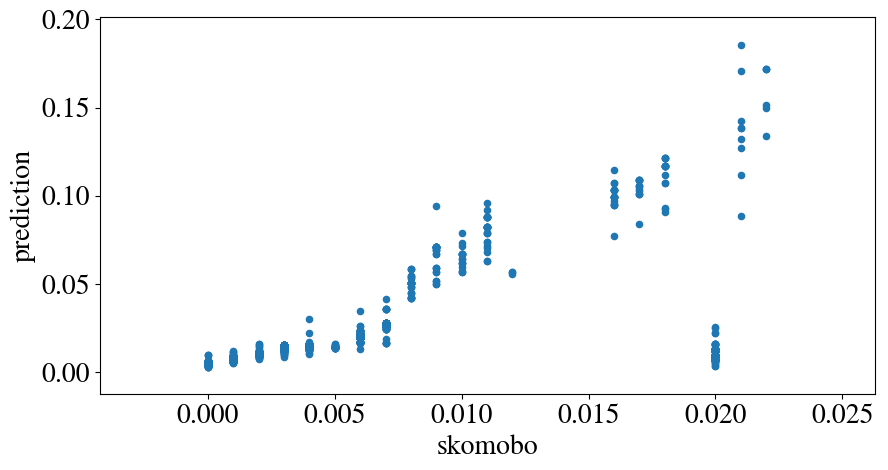

In [171]:
cleanTestPM2_5.plot(kind = "scatter", x="skomobo", y="dustrack")
cleanTestPM2_5.plot(kind = "scatter", x="skomobo", y="prediction")

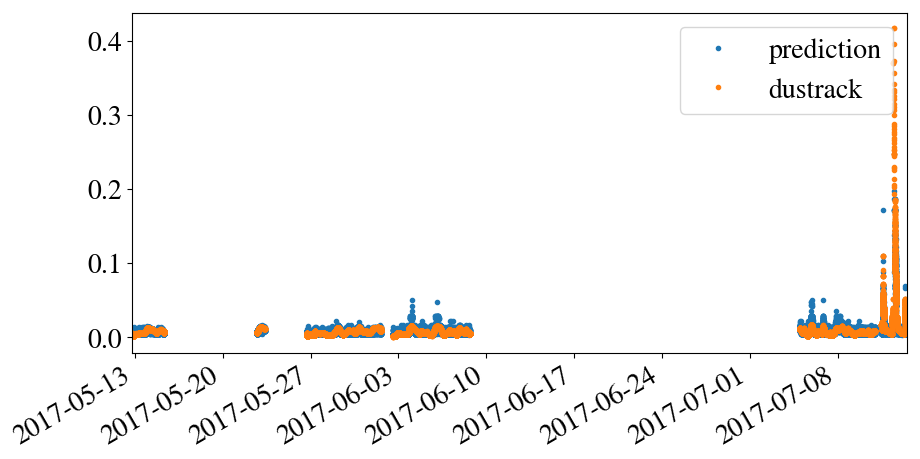

In [172]:
cleanTrainPM2_5[["prediction", "dustrack"]].plot(style='.')

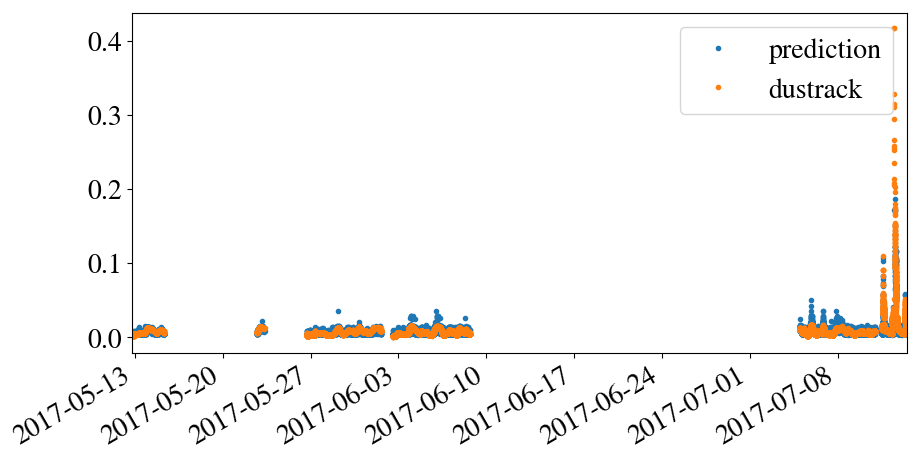

In [173]:
cleanTestPM2_5[["prediction", "dustrack"]].plot(style='.')

In [174]:
dirtyPM2_5Model = BaggingRegressor(random_state = 123).fit(trainPM2_5[["skomobo", "dust_diff"]], trainPM2_5["dustrack"])

In [175]:
trainPM2_5["other_prediction"] = dirtyPM2_5Model.predict(trainPM2_5[["skomobo", "dust_diff"]])

In [176]:
testPM2_5["other_prediction"] = dirtyPM2_5Model.predict(testPM2_5[["skomobo", "dust_diff"]])

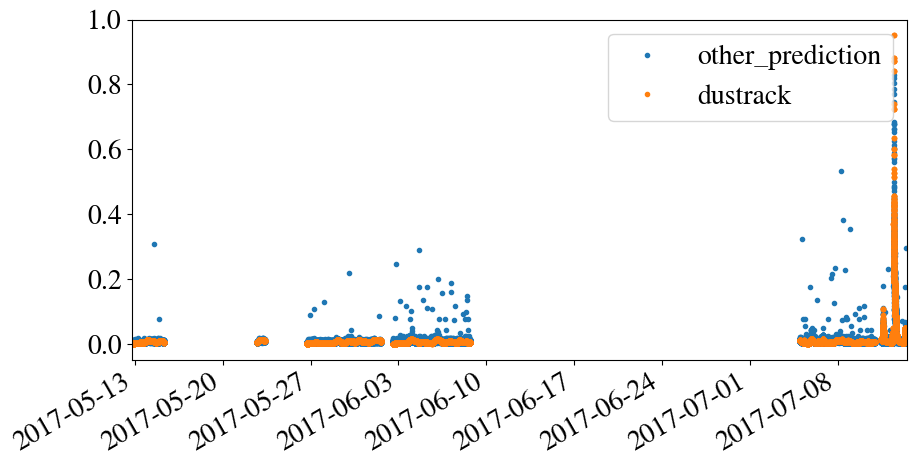

In [177]:
trainPM2_5[["other_prediction", "dustrack"]].plot(style='.')

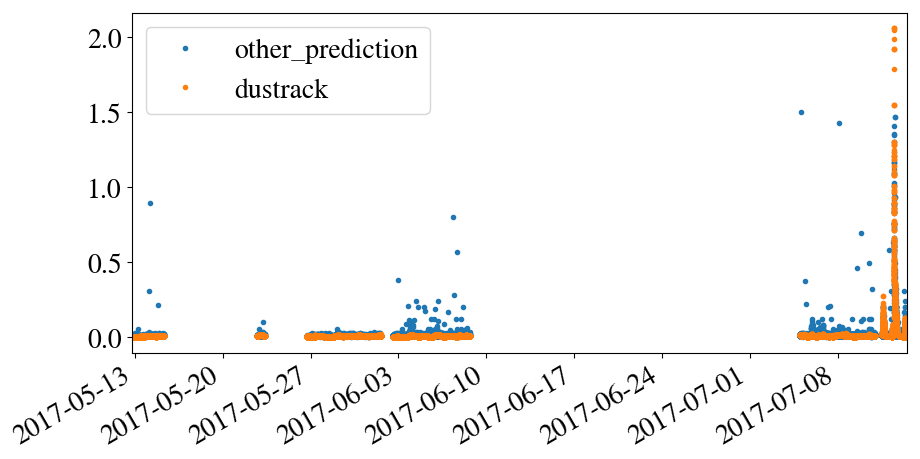

In [178]:
testPM10[["other_prediction", "dustrack"]].plot(style='.')

# Export models after training on all data not test train split

In [180]:
comparisonPM10["dust_diff"] = comparisonPM10["skomobo"] - comparisonPM10["skomobo"].shift(-1)
comparisonPM10 = comparisonPM10.fillna(0)
comparisonPM2_5["dust_diff"] = comparisonPM2_5["skomobo"] - comparisonPM2_5["skomobo"].shift(-1)
comparisonPM2_5 = comparisonPM2_5.fillna(0)

In [181]:
outlierDetectorPM10 = IsolationForest(contamination = 0.2, random_state = 123).fit(comparisonPM10[["skomobo"]])
comparisonPM10["is_inlier"] = outlierDetectorPM10.predict(comparisonPM10[["skomobo"]])

outlierDetectorPM2_5 = IsolationForest(contamination = 0.2, random_state = 123).fit(comparisonPM2_5[["skomobo"]])
comparisonPM2_5["is_inlier"] = outlierDetectorPM2_5.predict(comparisonPM2_5[["skomobo"]])

In [182]:
cleanPM10 = comparisonPM10[comparisonPM10["is_inlier"] == 1].copy()
cleanPM2_5 = comparisonPM2_5[comparisonPM2_5["is_inlier"] == 1].copy()

In [183]:
PM10Model = BaggingRegressor(random_state = 123).fit(cleanPM10[["skomobo", "dust_diff"]], cleanPM10["dustrack"])
PM2_5Model = BaggingRegressor(random_state = 123).fit(cleanPM2_5[["skomobo", "dust_diff"]], cleanPM2_5["dustrack"])

In [184]:
cleanPM10["prediction"] = PM10Model.predict(cleanPM10[["skomobo", "dust_diff"]])
cleanPM2_5["prediction"] = PM2_5Model.predict(cleanPM2_5[["skomobo", "dust_diff"]])

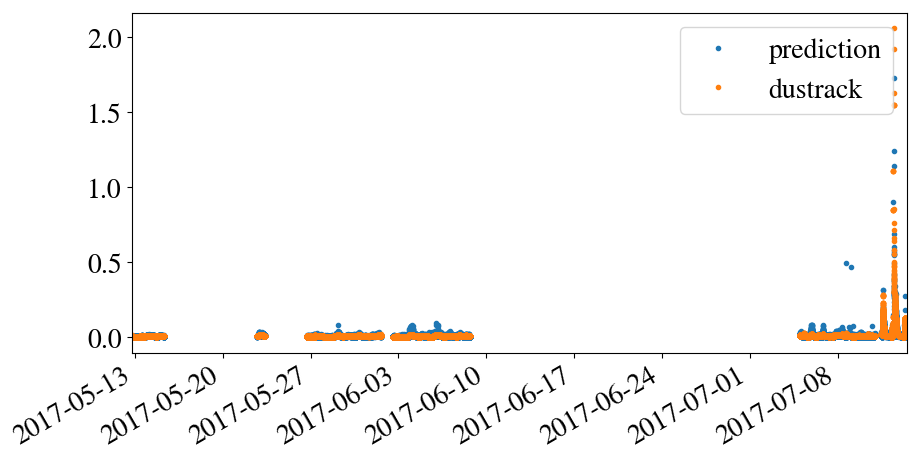

In [187]:
cleanPM10[["prediction", "dustrack"]].plot(style='.')

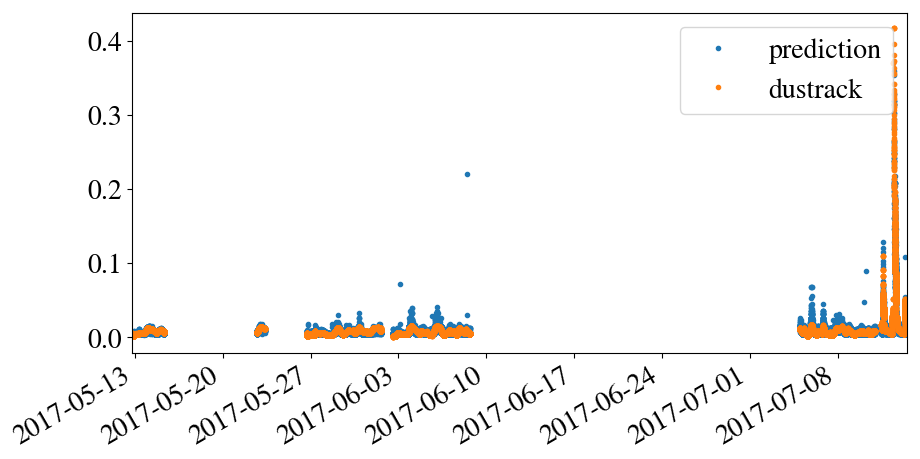

In [188]:
cleanPM2_5[["prediction", "dustrack"]].plot(style='.')

In [191]:
!pip install joblib

In [192]:
import joblib

In [193]:
joblib.dump?

In [196]:
joblib.dump(PM10Model, "PM10Model.pkl", protocol=2)

['PM10Model.pkl']

In [197]:
joblib.dump(PM2_5Model,"PM2_5Model.pkl", protocol=2)
joblib.dump(outlierDetectorPM10,"outlierDetectorPM10.pkl", protocol=2)
joblib.dump(outlierDetectorPM2_5,"outlierDetectorPM2_5.pkl", protocol=2)

['outlierDetectorPM2_5.pkl']